In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('SentAnalysis_Spa_to_Eng.csv')

In [3]:
df.head(1)

,Spanish,English,eng_sadness,eng_joy,eng_love,eng_anger,eng_fear,eng_surprise,spa_sadness,spa_joy,spa_love,spa_anger,spa_fear,spa_surprise
0,Son largas y aparte esta esta mención es. Para...,They are long and apart from this this mention...,0.000327,0.998569,0.00028,0.000273,0.000253,0.000299,0.007161,0.954246,0.003007,0.027996,0.00628,0.00131


## Note: the sentiments within each language are relative: in each sample the values add up to 1.0 for Spanish and for English.

In [4]:
ordered_columns = ['eng_sadness', 'spa_sadness', 
                   'eng_joy', 'spa_joy', 
                   'eng_love', 'spa_love', 
                   'eng_anger', 'spa_anger', 
                   'eng_fear', 'spa_fear', 
                   'eng_surprise', 'spa_surprise']

# Create a new DataFrame with the columns reordered
df = df[ordered_columns]
df.head()

,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise
0,0.000327,0.007161,0.998569,0.954246,0.000280,0.003007,0.000273,0.027996,0.000253,0.006280,0.000299,0.001310
1,0.102013,0.019489,0.798490,0.543834,0.003218,0.009557,0.089645,0.395938,0.005048,0.027925,0.001586,0.003257
2,0.020586,0.016694,0.564980,0.508440,0.003031,0.005596,0.397370,0.436137,0.012050,0.030408,0.001983,0.002725
3,0.000981,0.011552,0.981038,0.802784,0.008293,0.008076,0.008158,0.159256,0.000971,0.015909,0.000558,0.002423
4,0.000919,0.026346,0.993510,0.638471,0.001184,0.007418,0.003040,0.267258,0.000916,0.056165,0.000431,0.004343


In [5]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']].idxmax(axis=1)

In [6]:
# Remove the prefix "eng_" from each entry in the 'eng_highest_sent' column
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('eng_', '')

# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' column
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('spa_', '')

# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()

top_emotion_accuracy = matching_count/df.shape[0]*100
print(np.round(top_emotion_accuracy),"% of the English to Spanish translations by DeepTranslator have the same top-ranked emotion.")

45.0 % of the English to Spanish translations by DeepTranslator have the same top-ranked emotion.


In [7]:
# I don't think I ended up using this, 
# I was just playing around to see if we had ok sentiment matches in general, since there were ZERO matches on top sentiment

df['eng_positive'] = df['eng_joy'] + df['eng_love']
df['spa_positive'] = df['spa_joy'] + df['spa_love']

df['eng_negative'] = df['eng_sadness'] + df['eng_anger'] + df['eng_fear']
df['spa_negative'] = df['spa_sadness'] + df['spa_anger'] + df['spa_fear']

df['eng_neutral'] = df['eng_surprise']
df['spa_neutral'] = df['spa_surprise']

In [8]:
# Summary statistics for rows
row_summary = df.describe()

# Summary statistics for columns
col_summary = df[2:].describe()

# Overall summary statistics
overall_summary = df.describe().describe()

# Output the summary statistics
#print("Summary statistics for rows:")
#print(row_summary)
#print("\nSummary statistics for columns:")
#print(col_summary)
print("Column summary statistics\nfor Spa->Eng with DeepTranslator")
col_summary

Column summary statistics
for Spa->Eng with DeepTranslator


,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise,eng_positive,spa_positive,eng_negative,spa_negative,eng_neutral,spa_neutral
count,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000,1235.000000,1236.000000
mean,0.149860,0.036016,0.424015,0.581512,0.032147,0.012831,0.247655,0.325587,0.129189,0.040592,0.017134,0.003462,0.456162,0.594343,0.526703,0.402195,0.017134,0.003462
std,0.307993,0.093307,0.435318,0.240789,0.148950,0.035358,0.344333,0.207845,0.280082,0.045824,0.107090,0.001540,0.440756,0.239297,0.439915,0.238709,0.107090,0.001540
min,0.000157,0.000549,0.000194,0.000410,0.000102,0.000183,0.000106,0.000179,0.000091,0.000109,0.000093,0.000117,0.000319,0.000593,0.000415,0.000837,0.000093,0.000117
25%,0.001441,0.017429,0.006299,0.416992,0.000501,0.006698,0.002056,0.164355,0.000784,0.021877,0.000406,0.002706,0.009197,0.430143,0.014469,0.220306,0.000406,0.002706
50%,0.008029,0.023973,0.175516,0.605013,0.001281,0.010135,0.032133,0.299086,0.005332,0.033461,0.000945,0.003397,0.317583,0.620644,0.615696,0.375645,0.000945,0.003397
75%,0.053059,0.030380,0.963430,0.765626,0.003181,0.014302,0.462904,0.467755,0.054530,0.048572,0.002167,0.004210,0.981884,0.777271,0.986059,0.566351,0.002167,0.004210
max,0.999077,0.997993,0.999050,0.998336,0.995634,0.968331,0.997996,0.964648,0.997669,0.738219,0.991253,0.020156,0.999426,0.999009,0.999572,0.999291,0.991253,0.020156


In [17]:
# Extract English and Spanish sentiment columns
eng_sentiments = np.array(df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']])
spa_sentiments = np.array(df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']])

eng_sentiments_simpl = np.array(df[['eng_positive', 'eng_negative', 'eng_neutral']])
spa_sentiments_simpl = np.array(df[['spa_positive', 'spa_negative', 'spa_neutral']])


# Calculate stats for the difference between English and Spanish sentiments for each sentiment category
difference = eng_sentiments - spa_sentiments
abs_difference = abs(eng_sentiments - spa_sentiments)

abs_difference[np.isnan(abs_difference)] = 0

mean_abs_difference = np.mean(abs_difference, axis=0)

std_difference = np.std(abs_difference, axis=0)

min_difference = np.min(abs_difference, axis=0)

max_difference = np.max(abs_difference, axis=0)


concatenated_arrays = pd.concat([pd.Series(mean_abs_difference), pd.Series(std_difference), pd.Series(min_difference), pd.Series(max_difference)], axis=1)
concatenated_arrays.columns = ['Mean Absolute Difference', 'Standard Deviation', 'Minimum Absolute Difference', 'Maximum Absolute Difference']
concatenated_arrays.index = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
print('Statistics for absolute differences between English and Spanish Sentiments')
concatenated_arrays

difference_df = pd.DataFrame(difference).fillna(0)

Statistics for absolute differences between English and Spanish Sentiments


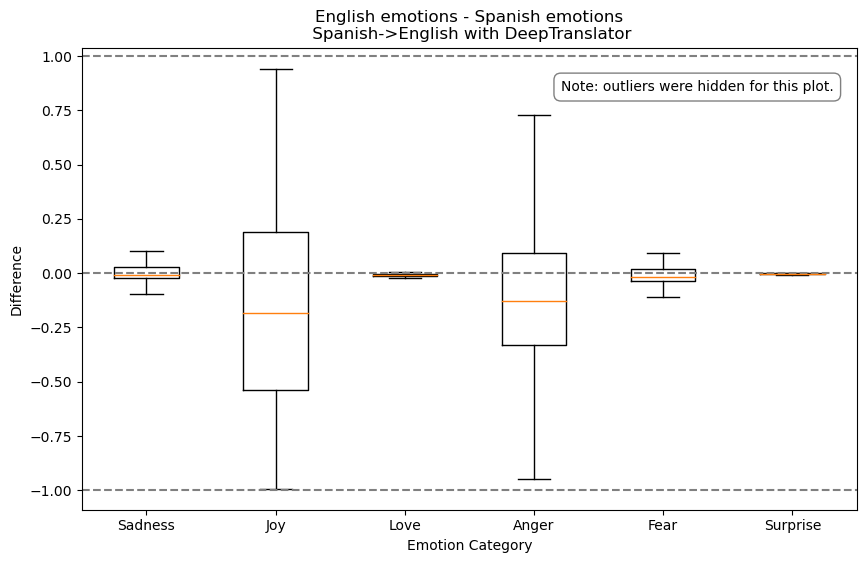

In [22]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(difference_df, labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], showfliers=False)
plt.title('English emotions - Spanish emotions\n Spanish->English with DeepTranslator')
plt.xlabel('Emotion Category')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.97, 0.93, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))


plt.show()

## Why do Joy and Anger have so much spread?

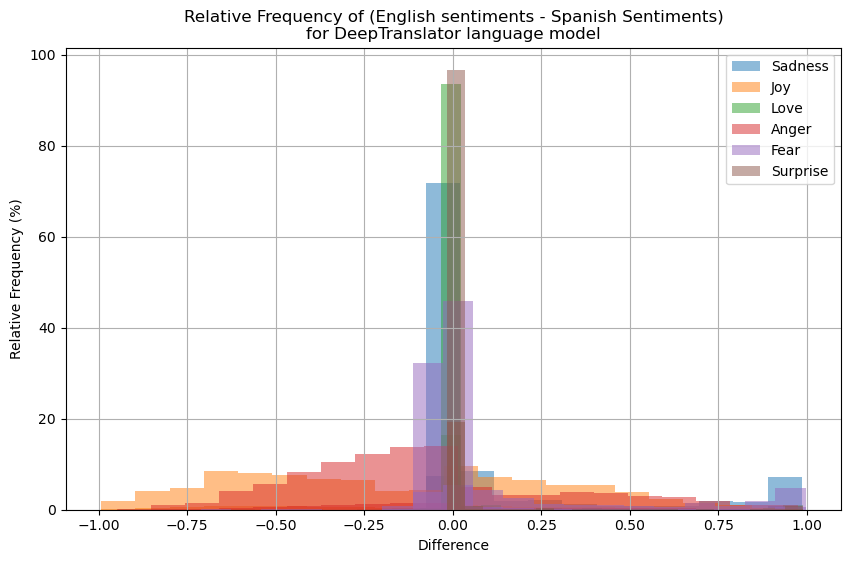

In [23]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each sentiment category
legend_handles = []  # To store legend handles
for i, sentiment in enumerate(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']):
    counts, bins, _ = ax.hist(difference[:, i], bins=20, alpha=0.5, density=True, label=sentiment)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    percent = counts / counts.sum() * 100
    bars = ax.bar(bin_centers, percent, width=(bins[1] - bins[0]), alpha=0.5)
    legend_handles.append(bars[0])  # Store only the first bar for each sentiment category

# Add labels and title
ax.set_title('Relative Frequency of (English sentiments - Spanish Sentiments)\nfor DeepTranslator language model')
ax.set_xlabel('Difference')
ax.set_ylabel('Relative Frequency (%)')

# Add legend with single entry for each sentiment category
ax.legend(legend_handles, ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

# Display the plot
plt.grid(True)
plt.show()

# Trying to do more stats with I'm not stoked on the results
Probably just want to drop these cells, but I wasn't sure yet.

In [ ]:
abs_diff_df = pd.DataFrame(abs_difference).rename(columns={0:'Sadness', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})
abs_diff_df

In [ ]:
from scipy.stats import ttest_1samp

sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# Perform one-sample t-test for each category
alpha = 0.05  # significance level

for sentiment in sentiments:
    stat, p_value = ttest_1samp(abs_diff_df[sentiment], 0)
    print(f"Sentiment: {sentiment}")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.")
    else:
        print("Fail to reject the null hypothesis: There is no evidence that the true absolute difference is not equal to 0.")
    print()